## 604 final project 

## A COMPREHENSIVE DATA ANALYSIS OF MARYLAND STATEWIDE VEHICLE CRASHES

### By
- Varun Balle - QL24695
- Sai Neelesh Kuntimala - YT93657
- Dheeraj Kumar Boddu -  DC32292
- Meghna Aryasri – BH11498
- Venkata Sridhar Perepu - SZ78217

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("my-downloads.db")
cur = conn.cursor()

In [3]:
tables = "SELECT name FROM sqlite_master WHERE type='table';"
cur.execute(tables)
#printing all tables in DB
for each in cur.fetchall():
    print(each[0])

Vehicle_Crashes
Person_Details
Vehicle_Details


In [33]:
#ALTER TABLE `foo` RENAME TO `bar`
#cursor = conn.execute('ALTER TABLE `Maryland_Statewide_Vehicle_Crashes_-_Vehicle_Details` RENAME TO `Vehicle_Details`')
#cursor = conn.execute('ALTER TABLE `Maryland_Statewide_Vehicle_Crashes_-_Person_Details__Anonymized_` RENAME TO `Person_Details`')
#cursor = conn.execute('ALTER TABLE `Maryland_Statewide_Vehicle_Crashes` RENAME TO `Vehicle_Crashes`')

In [127]:
#printing columns in Maryland_Statewide_Vehicle_Crashes
cursor = conn.execute('select * from Vehicle_Crashes')
col = list(map(lambda x: x[0], cursor.description))
print("number of columns in Vehicle_Crashes are "  + str(len(col)))
Vehicle_Crashes_results = cursor.fetchall()
print("number of rows in Vehicle_Crashes are "  + str(len(Vehicle_Crashes_results)))
print("##columns##")
for each in col:
    print(each)

number of columns in Vehicle_Crashes are 55
number of rows in Vehicle_Crashes are 848804
##columns##
YEAR
QUARTER
LIGHT_DESC
LIGHT_CODE
COUNTY_DESC
COUNTY_NO
MUNI_DESC
MUNI_CODE
JUNCTION_DESC
JUNCTION_CODE
COLLISION_TYPE_DESC
COLLISION_TYPE_CODE
SURF_COND_DESC
SURF_COND_CODE
LANE_CODE
RD_COND_DESC
RD_COND_CODE
RD_DIV_DESC
RD_DIV_CODE
FIX_OBJ_DESC
FIX_OBJ_CODE
REPORT_NO
REPORT_TYPE
WEATHER_DESC
WEATHER_CODE
ACC_DATE
ACC_TIME
LOC_CODE
SIGNAL_FLAG_DESC
SIGNAL_FLAG
C_M_ZONE_FLAG
AGENCY_CODE
AREA_CODE
HARM_EVENT_DESC1
HARM_EVENT_CODE1
HARM_EVENT_DESC2
HARM_EVENT_CODE2
RTE_NO
ROUTE_TYPE_CODE
RTE_SUFFIX
LOG_MILE
LOGMILE_DIR_FLAG_DESC
LOGMILE_DIR_FLAG
MAINROAD_NAME
DISTANCE
FEET_MILES_FLAG_DESC
FEET_MILES_FLAG
DISTANCE_DIR_FLAG
REFERENCE_NO
REFERENCE_TYPE_CODE
REFERENCE_SUFFIX
REFERENCE_ROAD_NAME
LATITUDE
LONGITUDE
LOCATION


In [128]:
#printing columns in Person_Details
cursor = conn.execute('select * from Person_Details')
col = list(map(lambda x: x[0], cursor.description))
print("number of columns in Person_Details are "  + str(len(col)))
Person_Details_results = cursor.fetchall()
print("number of rows in Person_Details are "  + str(len(Person_Details_results)))
print("##columns##")
for each in col:
    print(each)

number of columns in Person_Details are 48
number of rows in Person_Details are 1903316
##columns##
SEX_DESC
SEX_CODE
CONDITION_DESC
CONDITION_CODE
INJ_SEVER_DESC
INJ_SEVER_CODE
REPORT_NO
OCC_SEAT_POS_DESC
OCC_SEAT_POS_CODE
PED_VISIBLE_DESC
PED_VISIBLE_CODE
PED_OBEY_DESC
PED_OBEY_CODE
PED_TYPE_DESC
PED_TYPE_CODE
PED_LOCATION_CODE
MOVEMENT_DESC
MOVEMENT_CODE
PERSON_TYPE_DESC
PERSON_TYPE
ALCOHOL_TEST_DESC
ALCOHOL_TEST_CODE
ALCOHOL_TESTTYPE_DESC
ALCOHOL_TESTTYPE_CODE
DRUG_TEST_DESC
DRUG_TEST_CODE
DRUG_TESTRESULT_DESC
DRUG_TESTRESULT_CODE
BAC_CODE
FAULT_FLAG_DESC
FAULT_FLAG
EQUIP_PROB_DESC
EQUIP_PROB_CODE
SAF_EQUIP_DESC
SAF_EQUIP_CODE
EJECT_DESC
EJECT_CODE
DATE_OF_BIRTH
PERSON_ID
LICENSE_STATE_CODE
CLASS
CDL_FLAG_DESC
CDL_FLAG
VEHICLE_ID
EMS_UNIT_LABEL
AIRBAG_DEPLOYED
YEAR
Quarter


In [129]:
#printing columns in Vehicle_Details
cursor = conn.execute('select * from Vehicle_Details')
col = list(map(lambda x: x[0], cursor.description))
print("number of columns in Vehicle_Details are "  + str(len(col)))
Vehicle_Details_results = cursor.fetchall()
print("number of rows in Vehicle_Details are "  + str(len(Vehicle_Details_results)))
print("##columns##")
for each in col:
    print(each)

number of columns in Vehicle_Details are 49
number of rows in Vehicle_Details are 1386222
##columns##
HARM_EVENT_DESC
HARM_EVENT_CODE
CONTI_DIRECTION_DESC
CONTI_DIRECTION_CODE
DAMAGE_DESC
DAMAGE_CODE
MOVEMENT_DESC
MOVEMENT_CODE
VIN_NO
REPORT_NO
CV_BODY_TYPE_DESC
CV_BODY_TYPE_CODE
VEH_YEAR
VEH_MAKE
VEH_MODEL
COMMERCIAL_FLAG_DESC
COMMERCIAL_FLAG
HZM_NUM
TOWED_AWAY_FLAG_DESC
TOWED_AWAY_FLAG
NUM_AXLES
GVW_DESC
GVW_CODE
GOING_DIRECTION_DESC
GOING_DIRECTION_CODE
BODY_TYPE_DESC
BODY_TYPE_CODE
DRIVERLESS_FLAG_DESC
DRIVERLESS_FLAG
FIRE_FLAG_DESC
FIRE_FLAG
PARKED_FLAG_DESC
PARKED_FLAG
SPEED_LIMIT
HIT_AND_RUN_FLAG_DESC
HIT_AND_RUN_FLAG
HAZMAT_SPILL_FLAG_DESC
HAZMAT_SPILL_FLAG
VEHICLE_ID
TOWED_VEHICLE_CONFIG_DESC
TOWED_VEHICLE_CONFIG_CODE
AREA_DAMAGED_CODE_IMP1
AREA_DAMAGED_CODE1
AREA_DAMAGED_CODE2
AREA_DAMAGED_CODE3
AREA_DAMAGED_CODE_MAIN_DESC
AREA_DAMAGED_CODE_MAIN
YEAR
Quarter


In [40]:
#joined_results[0]

In [41]:
join_query = '''SELECT PD.YEAR,COUNT(*) FROM  Vehicle_Details VD JOIN Person_Details PD ON VD.REPORT_NO = PD.REPORT_NO AND 
                    VD.YEAR = PD.YEAR AND VD.Quarter = PD.Quarter JOIN Vehicle_Crashes VC ON VD.REPORT_NO = VC.REPORT_NO AND 
                    VD.YEAR = VC.YEAR AND VD.Quarter = VC.Quarter GROUP BY PD.YEAR'''
cursor = conn.execute(join_query)
yearCount = cursor.fetchall()

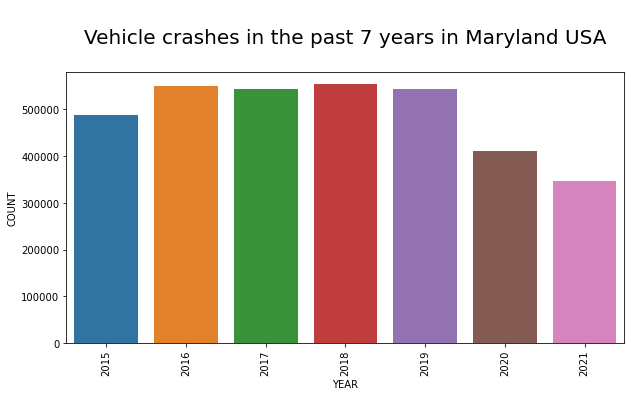

In [118]:
year_df = pd.DataFrame(yearCount)
year_df.columns = ['YEAR','COUNT']
plt.figure(figsize=(10,5))
ax = sns.barplot(data=year_df, x='YEAR', y = 'COUNT')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('\nVehicle crashes in the past 7 years in Maryland USA\n', fontsize=20);
plt.show()

In [93]:
join_query = '''SELECT VC.COUNTY_DESC,COUNT(*) FROM  Vehicle_Details VD JOIN Person_Details PD ON VD.REPORT_NO = PD.REPORT_NO AND 
                    VD.YEAR = PD.YEAR AND VD.Quarter = PD.Quarter JOIN Vehicle_Crashes VC ON VD.REPORT_NO = VC.REPORT_NO AND 
                    VD.YEAR = VC.YEAR AND VD.Quarter = VC.Quarter GROUP BY VC.COUNTY_DESC'''
cursor = conn.execute(join_query)
contyDes = cursor.fetchall()

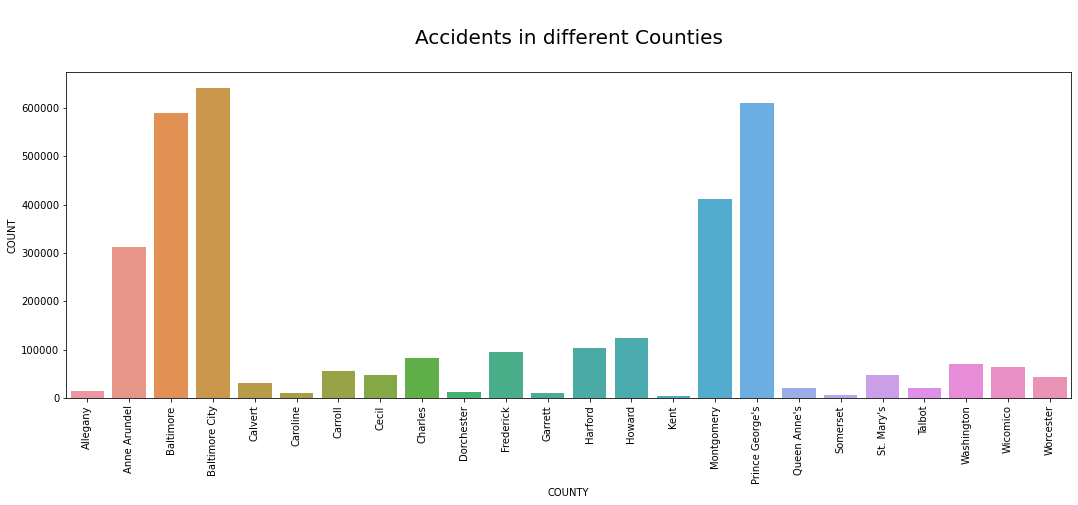

In [117]:
county_df = pd.DataFrame(contyDes)
county_df.columns = ['COUNTY','COUNT']
county_df = county_df[county_df['COUNTY'].notna()]
plt.figure(figsize=(18,6))
ax = sns.barplot(data=county_df, x='COUNTY', y = 'COUNT')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('\nAccidents in different Counties\n', fontsize=20);
plt.show()

In [96]:
join_query = '''SELECT VC.REPORT_TYPE,COUNT(*) FROM  Vehicle_Details VD JOIN Person_Details PD ON VD.REPORT_NO = PD.REPORT_NO AND 
                    VD.YEAR = PD.YEAR AND VD.Quarter = PD.Quarter JOIN Vehicle_Crashes VC ON VD.REPORT_NO = VC.REPORT_NO AND 
                    VD.YEAR = VC.YEAR AND VD.Quarter = VC.Quarter GROUP BY VC.REPORT_TYPE'''
cursor = conn.execute(join_query)
report = cursor.fetchall()

                    TYPE    COUNT
1            Fatal Crash    17410
2           Injury Crash  1046409
3  Property Damage Crash  1883850


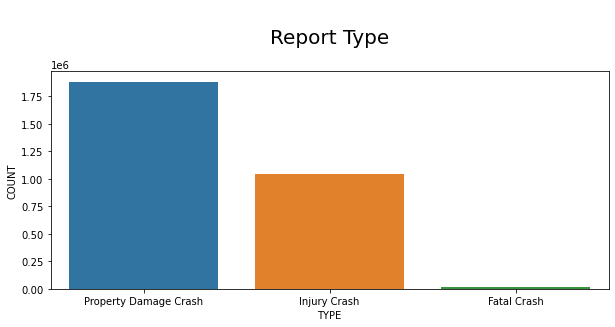

In [120]:
report_df = pd.DataFrame(report)
report_df.columns = ['TYPE','COUNT']
report_df = report_df[report_df['TYPE'].notna()]
print(report_df)
plt.figure(figsize=(10,4))
ax = sns.barplot(data=report_df, x='TYPE', y = 'COUNT', order = report_df.sort_values('COUNT', ascending = False).TYPE)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('\nReport Type\n', fontsize=20);
plt.show()

In [11]:
join_query = '''SELECT VC.Quarter,COUNT(*) FROM  Vehicle_Details VD JOIN Person_Details PD ON VD.REPORT_NO = PD.REPORT_NO AND 
                    VD.YEAR = PD.YEAR AND VD.Quarter = PD.Quarter JOIN Vehicle_Crashes VC ON VD.REPORT_NO = VC.REPORT_NO AND 
                    VD.YEAR = VC.YEAR AND VD.Quarter = VC.Quarter GROUP BY VC.Quarter'''
cursor = conn.execute(join_query)
qut = cursor.fetchall()

  Quarter   COUNT
0      Q1  790735
1      Q2  873684
2      Q3  924708
3      Q4  847212


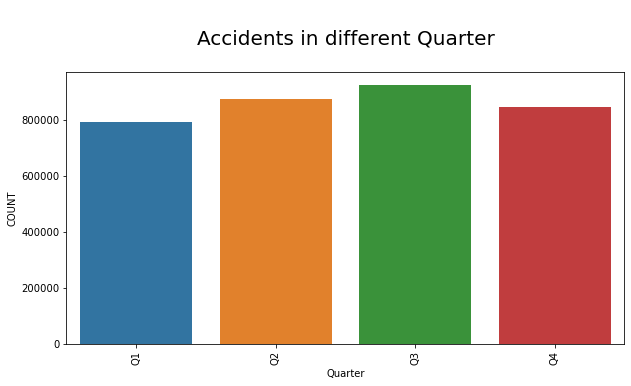

In [12]:
quarter_df = pd.DataFrame(qut)
quarter_df.columns = ['Quarter','COUNT']
quarter_df = quarter_df[quarter_df['Quarter'].notna()]
print(quarter_df)
plt.figure(figsize=(10,5))
ax = sns.barplot(data=quarter_df, x='Quarter', y = 'COUNT')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('\nAccidents in different Quarter\n', fontsize=20);
plt.show()

In [108]:
join_query = '''SELECT VC.LIGHT_DESC,COUNT(*) FROM  Vehicle_Details VD JOIN Person_Details PD ON VD.REPORT_NO = PD.REPORT_NO AND 
                    VD.YEAR = PD.YEAR AND VD.Quarter = PD.Quarter JOIN Vehicle_Crashes VC ON VD.REPORT_NO = VC.REPORT_NO AND 
                    VD.YEAR = VC.YEAR AND VD.Quarter = VC.Quarter GROUP BY VC.LIGHT_DESC'''
cursor = conn.execute(join_query)
light = cursor.fetchall()

                     light    COUNT
1  Dark - Unknown Lighting    17434
2           Dark Lights On   738426
3           Dark No Lights   166272
4                     Dawn    32795
5                 Daylight  2244457
6                     Dusk    37791
7           Not Applicable    52164
8                    Other     9441
9                  Unknown    24882


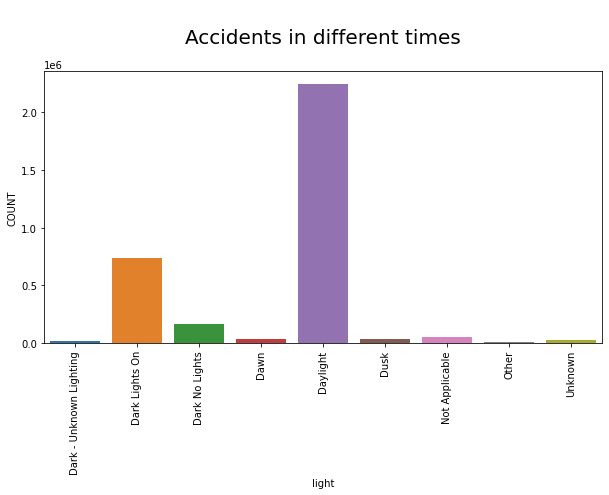

In [113]:
light_df = pd.DataFrame(light)
light_df.columns = ['light','COUNT']
light_df = light_df[light_df['light'].notna()]
print(light_df)
plt.figure(figsize=(10,5))
ax = sns.barplot(data=light_df, x='light', y = 'COUNT')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('\nAccidents in different times\n', fontsize=20);
plt.show()

In [122]:
join_query = '''SELECT VC.WEATHER_DESC,COUNT(*) FROM  Vehicle_Details VD JOIN Person_Details PD ON VD.REPORT_NO = PD.REPORT_NO AND 
                    VD.YEAR = PD.YEAR AND VD.Quarter = PD.Quarter JOIN Vehicle_Crashes VC ON VD.REPORT_NO = VC.REPORT_NO AND 
                    VD.YEAR = VC.YEAR AND VD.Quarter = VC.Quarter GROUP BY VC.WEATHER_DESC'''
cursor = conn.execute(join_query)
weather = cursor.fetchall()

                     weather   COUNT
1   Blowing Sand, Soil, Dirt     184
2               Blowing Snow    2922
4                     Cloudy  143772
5                      Foggy   15083
6             Not Applicable  312622
7                      Other    8649
8                    Raining  414965
9               Severe Winds    4135
10                     Sleet    3358
11                      Snow   16313
12                   Unknown   14568
13                Wintry Mix   17544


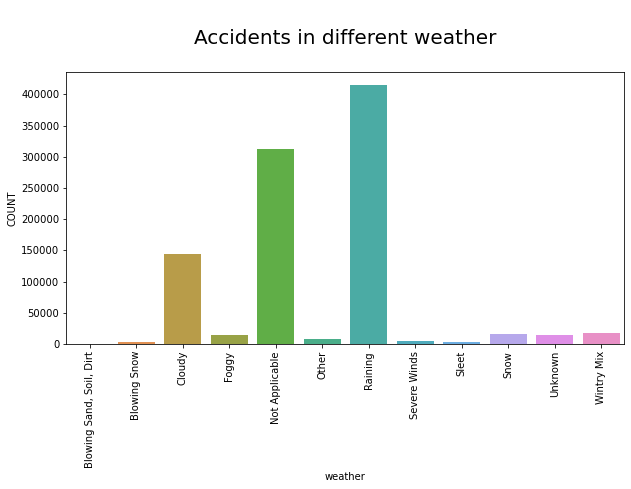

In [124]:
weather_df = pd.DataFrame(weather)
weather_df.columns = ['weather','COUNT']
weather_df = weather_df[weather_df.weather != 'Clear']
weather_df = weather_df[weather_df['weather'].notna()]
print(weather_df)
plt.figure(figsize=(10,5))
ax = sns.barplot(data=weather_df, x='weather', y = 'COUNT')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('\nAccidents in different weather\n', fontsize=20);
plt.show()

In [4]:
join_query = '''SELECT VD.MOVEMENT_DESC,COUNT(*) FROM  Vehicle_Details VD JOIN Person_Details PD ON VD.REPORT_NO = PD.REPORT_NO AND 
                    VD.YEAR = PD.YEAR AND VD.Quarter = PD.Quarter JOIN Vehicle_Crashes VC ON VD.REPORT_NO = VC.REPORT_NO AND 
                    VD.YEAR = VC.YEAR AND VD.Quarter = VC.Quarter GROUP BY VD.MOVEMENT_DESC'''
cursor = conn.execute(join_query)
mov = cursor.fetchall()

                     movement    COUNT
0                Accelerating   209267
1                     Backing    65218
2              Changing Lanes    78259
3   Driverless Moving Vehicle     1112
4       Entering Traffic Lane    14084
5        Leaving Traffic Lane     5213
6            Making Left Turn   220146
7           Making Right Turn    67085
8               Making U Turn    18729
9       Moving Constant Speed  1349081
10        Negotiating a Curve     9726
11             Not Applicable    21639
12                      Other    14250
13                     Parked   219569
14                    Parking    16678
15                    Passing    17772
16          Right Turn on Red     2431
17                   Skidding    23178
18        Slowing or Stopping   587397
19         Starting From Lane    67715
20       Starting From Parked    30688
21    Stopped in Traffic Lane   332427
22                    Unknown    64675


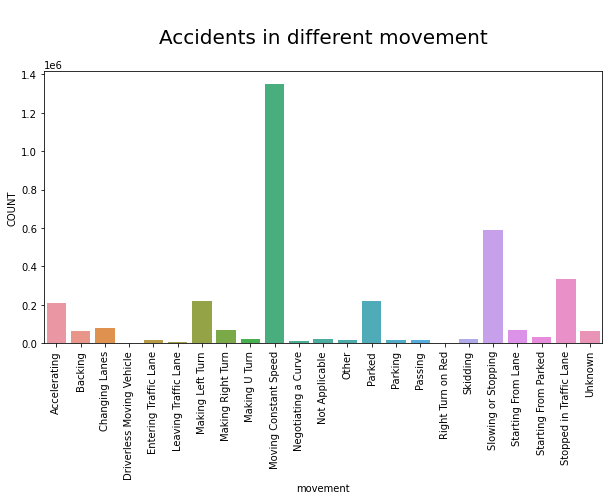

In [6]:
movement_df = pd.DataFrame(mov)
movement_df.columns = ['movement','COUNT']
movement_df = movement_df[movement_df['movement'].notna()]
print(movement_df)
plt.figure(figsize=(10,5))
ax = sns.barplot(data=movement_df, x='movement', y = 'COUNT')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('\nAccidents in different movement\n', fontsize=20);
plt.show()

In [6]:
AVG_query = '''SELECT AVG(VD.SPEED_LIMIT) FROM  Vehicle_Details VD JOIN Person_Details PD ON VD.REPORT_NO = PD.REPORT_NO AND 
                    VD.YEAR = PD.YEAR AND VD.Quarter = PD.Quarter JOIN Vehicle_Crashes VC ON VD.REPORT_NO = VC.REPORT_NO AND 
                    VD.YEAR = VC.YEAR AND VD.Quarter = VC.Quarter'''
max_query = '''SELECT max(VD.SPEED_LIMIT) FROM  Vehicle_Details VD JOIN Person_Details PD ON VD.REPORT_NO = PD.REPORT_NO AND 
                    VD.YEAR = PD.YEAR AND VD.Quarter = PD.Quarter JOIN Vehicle_Crashes VC ON VD.REPORT_NO = VC.REPORT_NO AND 
                    VD.YEAR = VC.YEAR AND VD.Quarter = VC.Quarter'''
cursor = conn.execute(join_query)
avg = cursor.fetchall()

In [7]:
mov

[(35.646979241570754,)]